Importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import neattext.functions as nfx
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

Importing the cleaned dataset:

In [2]:
import os
dir = os.getcwd()
os.chdir("..")

cleaned_train = pd.read_csv("datasets/clean_train.csv")
os.chdir(dir)

View the cleaned dataset to ensure that the imported dataset is correct:

In [3]:
cleaned_train.head()

,Unnamed: 0,text,emotion,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliated
1,1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful cares awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feeling grouchy


We start the EDA process by viewing the most commonly used words using WordCLoud:

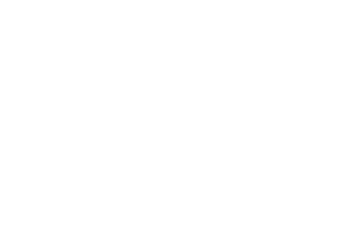

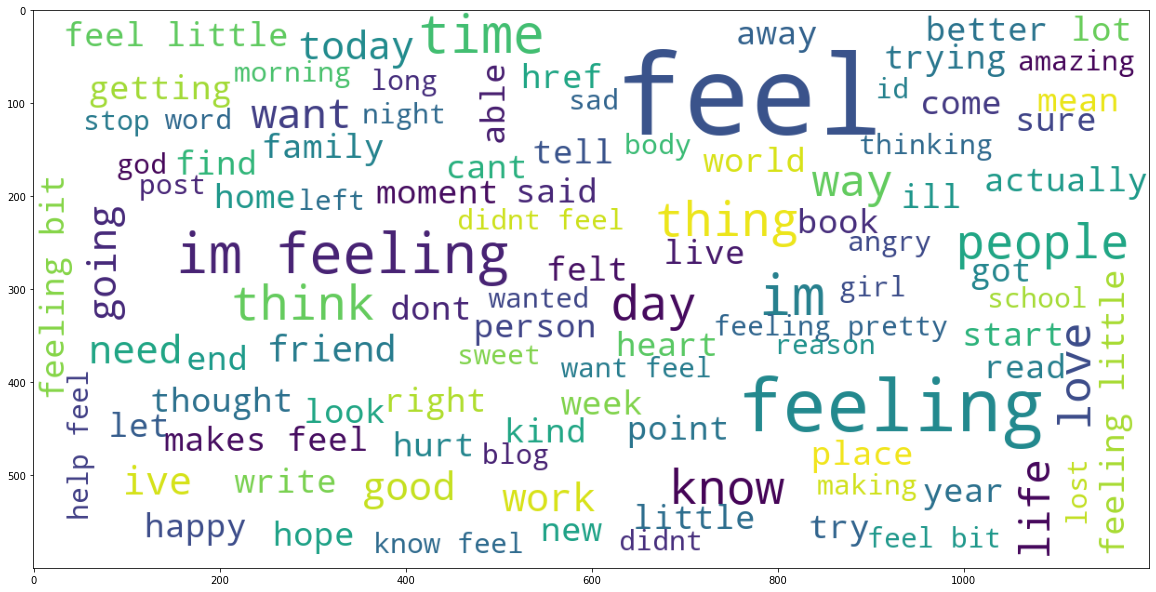

In [33]:
from wordcloud import WordCloud

text= ' '.join(t for t in cleaned_train['clean_text'])
words_list= text.split()

wordcloud = WordCloud(background_color='white', max_words=100, max_font_size=40, scale=3, random_state=1).generate(text)
plt.axis("off")
plt.figure(figsize = (30,30))
plt.imshow(wordcloud)